In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [39]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"


In [40]:
# importing the BodyMearurements dataset
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/BodyMeasurements.csv')
df.columns = df.columns.str.strip()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


Columns name translations:
- Gender -> Genere
- Age -> Età
- HeadCircumference -> CirconferenzaTesta
- ShoulderWidth -> LarghezzaSpalle
- ChestWidth -> LarghezzaTorace
- Belly -> Pancia
- Waist -> Vita
- Hips -> Fianchi
- ArmLength -> LunghezzaBraccio
- ShoulderToWaist -> SpallaAVita
- WaistToKnee -> VitaAGinocchio
- LegLength -> LunghezzaGamba
- TotalHeight -> AltezzaTotale

# Data Cleaning

In [41]:
# Seaborn pairplot
# sns.pairplot(df, kind='scatter', diag_kind='kde')


We can clearly see the presence of some **very marked outliers** (particularly evident for "HeadCircumference"). 

A removal using the variance method should ensure their identification.

In [42]:
# Select the columns "HeadCircumference"
HC_data = df['HeadCircumference']

# Calculate the mean and standard deviation of the data
mean = HC_data.mean()
std = HC_data.std()

# Define the threshold for identifying outliers (number of standard deviations from the mean)
threshold = 3

# Compute the thresholds for outlier detection
computed_threshold = threshold * std

# Identify outliers based on the standard deviation method
standard_deviation_HC_outliers = np.abs(HC_data - mean) > computed_threshold

# Count the number of outliers
num_outliers = standard_deviation_HC_outliers.sum()

# Print the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Threshold: {threshold}")
print(f"Computed Threshold: {computed_threshold}")
print(f"Number of Outliers: {num_outliers}")

Mean: 20.574022346368714
Standard Deviation: 3.743353422674967
Threshold: 3
Computed Threshold: 11.2300602680249
Number of Outliers: 3


In [43]:
# Select the columns "HeadCircumference"
W_data = df['Waist']

# Calculate the mean and standard deviation of the data
mean = W_data.mean()
std = W_data.std()

# Define the threshold for identifying outliers (number of standard deviations from the mean)
threshold = 3

# Compute the thresholds for outlier detection
computed_threshold = threshold * std

# Identify outliers based on the standard deviation method
standard_deviation_W_outliers = np.abs(W_data - mean) > computed_threshold

# Count the number of outliers
num_outliers = standard_deviation_W_outliers.sum()

# Print the results
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Threshold: {threshold}")
print(f"Computed Threshold: {computed_threshold}")
print(f"Number of Outliers: {num_outliers}")

Mean: 19.26536312849162
Standard Deviation: 8.770706249766977
Threshold: 3
Computed Threshold: 26.312118749300932
Number of Outliers: 9


In [44]:
# Remove the outliers from the data
df = df[~standard_deviation_HC_outliers & ~standard_deviation_W_outliers]


# Data Exploration

In [45]:
data = df[['Waist', 'TotalHeight']]


In [46]:
# Order by Waist
data = data.sort_values(by='Waist')


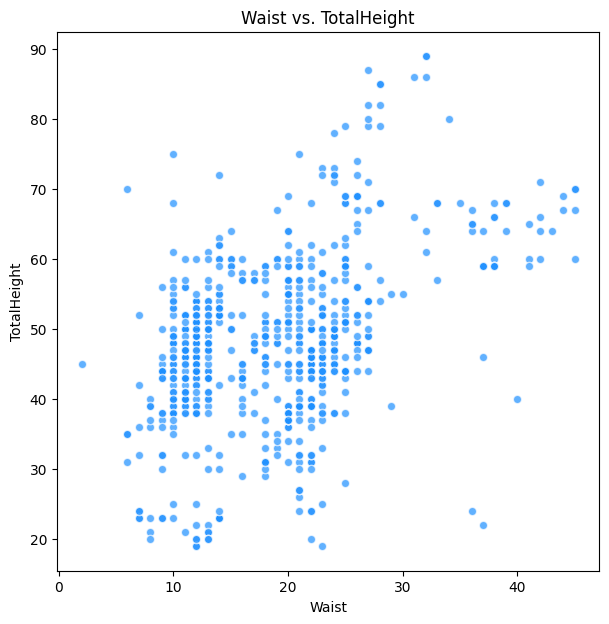

In [47]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.figure(figsize=(7, 7))
plt.scatter(data['Waist'], data['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=.7)
plt.title('Waist vs. TotalHeight')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.show()


In [48]:
# Standardizing the data
scaler = MinMaxScaler()
data_columns = data.columns
data = scaler.fit_transform(data)

# Convert the standardized data back to a dataframe and retain the column names
data = pd.DataFrame(data, columns=data_columns)


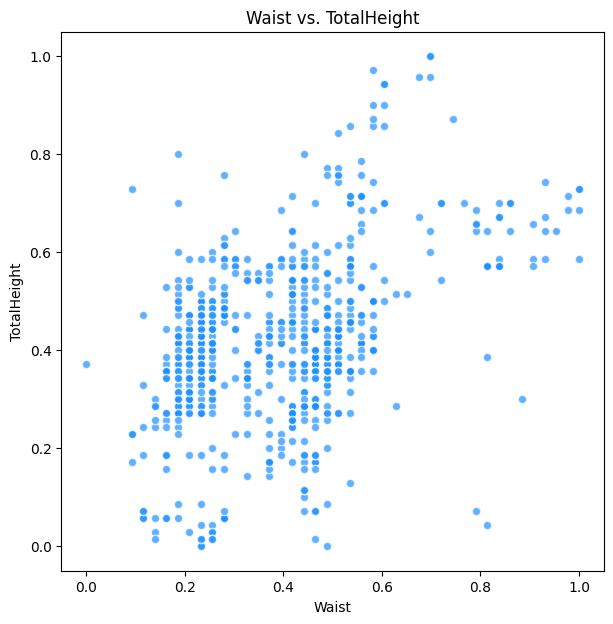

In [49]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.figure(figsize=(7, 7))
plt.scatter(data['Waist'], data['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7)
plt.title('Waist vs. TotalHeight')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.show()


In [50]:
data.iloc[0][0]


C:\Users\vinor\AppData\Local\Temp\ipykernel_344\168883120.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data.iloc[0][0]


np.float64(0.0)

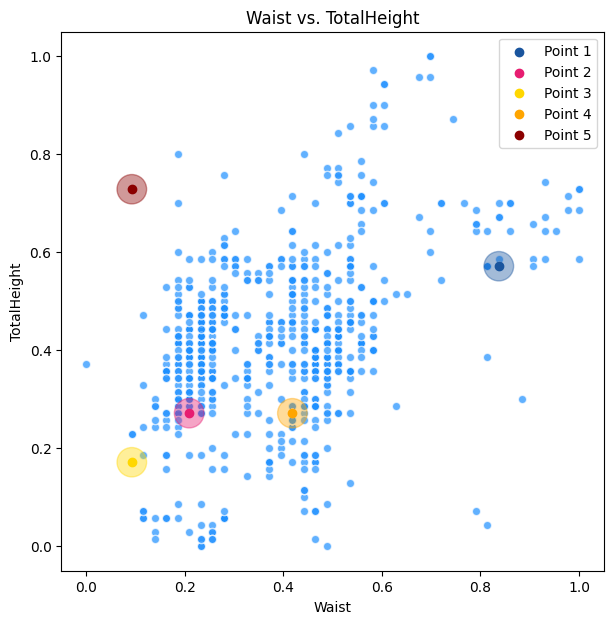

In [51]:
# Seleziona 5 osservazioni dai dati
point_1 = data.iloc[680] # Touches 2
point_2 = data.iloc[100]
point_3 = data.iloc[2] # Touches 4
point_4 = data.iloc[400] # Touches 5
point_5 = data.iloc[4]

points = [point_1, point_2, point_3, point_4, point_5]

colors = [color_blue, color_pink, color_gold, color_orange, color_red]

# Definisci il raggio
radius = 0.03

# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(data['Waist'], data['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7)

# Aggiungi il cerchio
for i, point in enumerate(points):
    circle = plt.Circle((point['Waist'], point['TotalHeight']), radius, color=colors[i], fill=True, linewidth=1, alpha=0.4)
    plt.gca().add_patch(circle)
    plt.scatter(point['Waist'], point['TotalHeight'], color=colors[i], label=f'Point {i+1}')

plt.title('Waist vs. TotalHeight')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

Count for each point the number of points it touches with its radius.

Now we define a **Core Point** to be one that is close to at least 4 other points (the number of core point is user defined)
- Pink point
- Orange Point

In [52]:
# Function to count points within a given radius for each point in the dataset
def find_core_points(data, radius, min_points):
    core_points = []
    for index, point in data.iterrows():
        # Count the number of points within the radius
        count = ((data['Waist'] - point['Waist'])**2 + (data['TotalHeight'] - point['TotalHeight'])**2 <= radius**2).sum()
        # if the number of points is greater than or equal to the minimum number of points, add the point to the core_points list
        if count >= min_points:
            core_points.append(point)
    return pd.DataFrame(core_points)

# Define the radius and minimum number of points
radius = 0.03
min_points = 5

# Find core points
core_points = find_core_points(data, radius, min_points)

# Print the results
print(f"Number of core points: {len(core_points)}")



Number of core points: 563


In [53]:
non_core_points = data[~data.isin(core_points)].dropna()

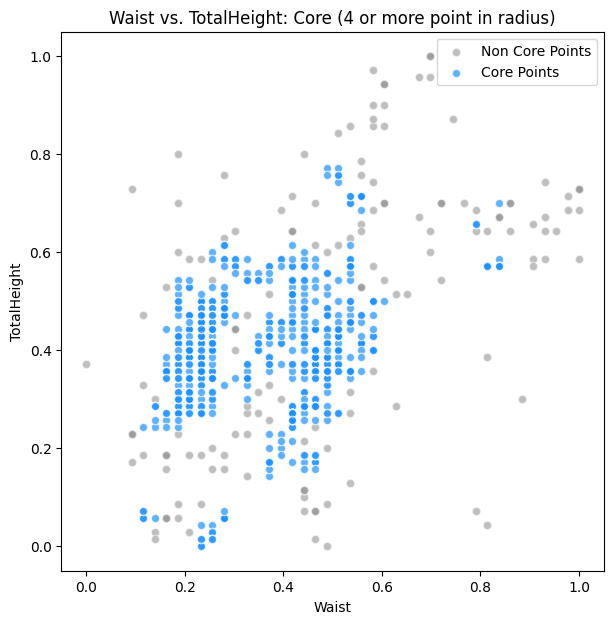

In [54]:

# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=0.5, label = "Non Core Points")
plt.scatter(core_points['Waist'], core_points['TotalHeight'],facecolors=color_blue_light, edgecolors='white', alpha=.7, label=f'Core Points')
plt.title('Waist vs. TotalHeight: Core (4 or more point in radius)')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

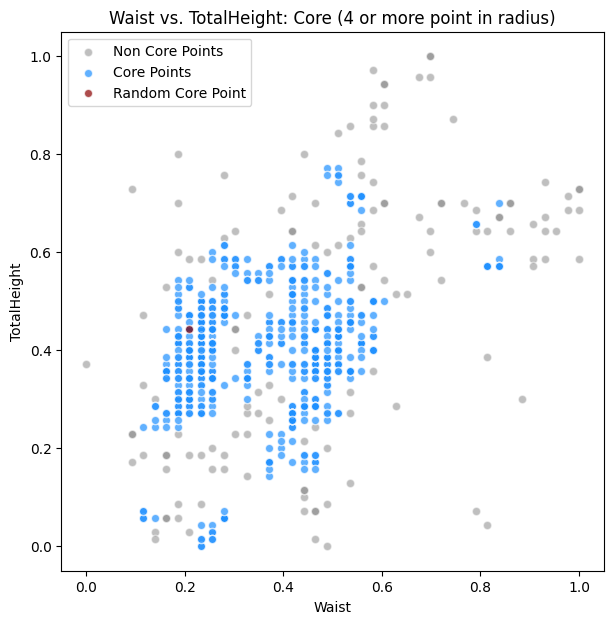

In [55]:
import random

# Set see for reproducibility
random.seed(0)

# Select a random core point
random_core_point = core_points.sample(n=1)

# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=0.5, label="Non Core Points")
plt.scatter(core_points['Waist'], core_points['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7, label='Core Points')

# Highlight the random core point in dark red
plt.scatter(random_core_point['Waist'], random_core_point['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Random Core Point')

plt.title('Waist vs. TotalHeight: Core (4 or more point in radius)')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

In [56]:
def find_points_within_radius(data, random_point, radius):
    points_within_radius = []
    for index, point in data.iterrows():
        distance = np.sqrt((random_point['Waist'].values[0] - point['Waist'])**2 + (random_point['TotalHeight'].values[0] - point['TotalHeight'])**2)
        if distance <= radius:
            points_within_radius.append(index)
    return data.loc[points_within_radius]

# Trova i punti che rientrano nel raggio del punto random
points_within_radius_random = find_points_within_radius(data, random_core_point, radius)
points_within_radius_random

,Waist,TotalHeight
45,0.186047,0.428571
54,0.186047,0.442857
68,0.186047,0.428571
84,0.186047,0.428571
87,0.209302,0.471429
89,0.209302,0.414286
91,0.209302,0.442857
93,0.209302,0.442857
103,0.209302,0.442857
104,0.209302,0.471429


c:\Users\vinor\Desktop\Develhope\projects\EDU-Clustering\.venv\Lib\site-packages\matplotlib\transforms.py:2048: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[0, 2] += tx
c:\Users\vinor\Desktop\Develhope\projects\EDU-Clustering\.venv\Lib\site-packages\matplotlib\transforms.py:2049: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._mtx[1, 2] += ty


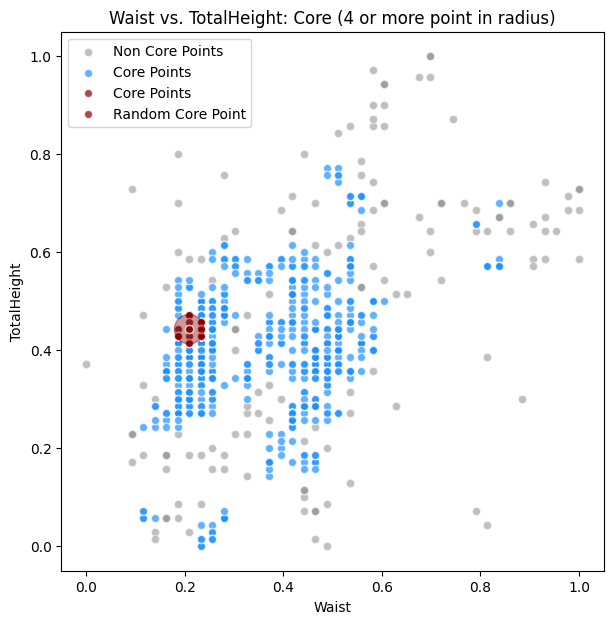

In [57]:
# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=0.5, label="Non Core Points")
plt.scatter(core_points['Waist'], core_points['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7, label='Core Points')
plt.scatter(points_within_radius_random['Waist'], points_within_radius_random['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Core Points')

circle = plt.Circle((random_core_point['Waist'], random_core_point['TotalHeight']), radius, color=colors[i], fill=True, linewidth=1, alpha=0.4)
plt.gca().add_patch(circle)
# Highlight the random core point in dark red
plt.scatter(random_core_point['Waist'], random_core_point['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Random Core Point')

plt.title('Waist vs. TotalHeight: Core (4 or more point in radius)')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

In [58]:
points_within_radius_random

,Waist,TotalHeight
45,0.186047,0.428571
54,0.186047,0.442857
68,0.186047,0.428571
84,0.186047,0.428571
87,0.209302,0.471429
89,0.209302,0.414286
91,0.209302,0.442857
93,0.209302,0.442857
103,0.209302,0.442857
104,0.209302,0.471429


In [59]:
# Initialize an empty set to store unique indexes
unique_indexes = set()

# For each point in points_within_radius_random
for i in points_within_radius_random.index:
    # Find points within radius of this point
    points_in_radius = find_points_within_radius(data, data.loc[[i]], radius)
    
    # Exclude non-core points from points_in_radius
    points_in_radius = points_in_radius[points_in_radius.index.isin(core_points.index)]
    
    # Add their indexes to the set (automatically handles duplicates)
    unique_indexes.update(points_in_radius.index)

# Convert set to list for easier handling if needed
# Extract observations from data using these indexes
new_observations = data.loc[list(unique_indexes)]
new_observations

,Waist,TotalHeight
128,0.209302,0.400000
130,0.232558,0.428571
133,0.232558,0.414286
139,0.232558,0.414286
147,0.232558,0.442857
...,...,...
237,0.255814,0.414286
241,0.255814,0.471429
116,0.209302,0.471429
119,0.209302,0.400000


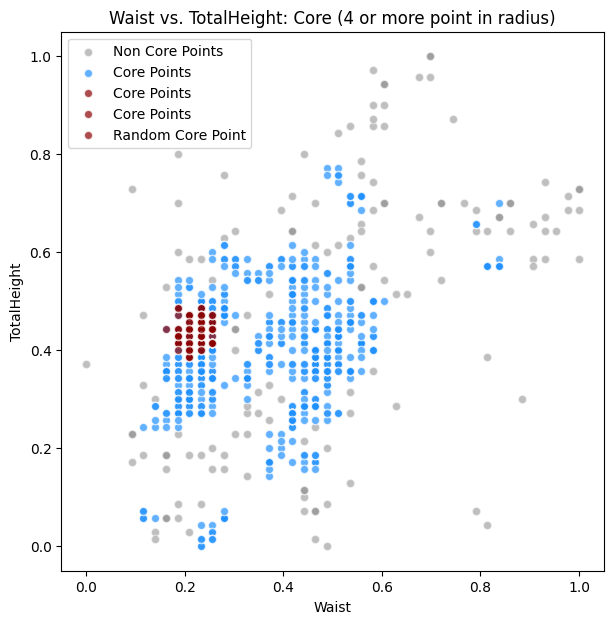

In [60]:
# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=0.5, label="Non Core Points")
plt.scatter(core_points['Waist'], core_points['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7, label='Core Points')
plt.scatter(points_within_radius_random['Waist'], points_within_radius_random['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Core Points')
plt.scatter(new_observations['Waist'], new_observations['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Core Points')

# circle = plt.Circle((random_core_point['Waist'], random_core_point['TotalHeight']), radius, color=colors[i], fill=True, linewidth=1, alpha=0.4)
# plt.gca().add_patch(circle)
# # Highlight the random core point in dark red
plt.scatter(random_core_point['Waist'], random_core_point['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Random Core Point')

plt.title('Waist vs. TotalHeight: Core (4 or more point in radius)')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), the clustering process follows these steps:

1. **Identify core points**: Points with at least `min_points` neighbors within radius `r`.
2. **Expand clusters iteratively**:
    - Start with a random core point
    - Find all points within radius of this core point
    - For each core point in this neighborhood, find additional points within its radius
    - The process continues until no more points can be added to the cluster

This expansion mechanism is what allows DBSCAN to find arbitrarily shaped clusters, unlike centroid-based methods like K-means. The algorithm will continue expanding the cluster until it has reached all density-connected points.

When there are no more reachable points to add to the current cluster, DBSCAN will start a new cluster with another unvisited core point, or classify remaining points as noise.

In [61]:
def demonstrate_cluster_expansion(data, start_point_index, radius, core_points):
    """
    Demonstrates how DBSCAN expands clusters through density-reachability.
    
    Parameters:
    - data: DataFrame with coordinates
    - start_point_index: Index of the initial core point
    - radius: Maximum distance for neighborhood
    - core_points: DataFrame containing core points
    
    Returns:
    - cluster_points: DataFrame of all points in the expanded cluster
    """
    # Initialize visited and cluster points
    visited = set()
    cluster_points_indices = set()
    
    # Start with the initial point
    seeds = [start_point_index]
    visited.add(start_point_index)
    cluster_points_indices.add(start_point_index)
    
    # Process all seeds (breadth-first expansion)
    while seeds:
        current_point = seeds.pop(0)
        
        # Find neighbors
        neighbors = find_points_within_radius(data, data.loc[[current_point]], radius)
        
        for neighbor_idx in neighbors.index:
            # If not visited, mark as visited and add to cluster
            if neighbor_idx not in visited:
                visited.add(neighbor_idx)
                cluster_points_indices.add(neighbor_idx)
                
                # If it's a core point, add its neighbors to be processed
                if neighbor_idx in core_points.index:
                    seeds.append(neighbor_idx)
    
    # Return the cluster as a DataFrame
    return data.loc[list(cluster_points_indices)]

# Demonstrate the expansion starting from our random core point
random_point_idx = random_core_point.index[0]
expanded_cluster = demonstrate_cluster_expansion(data, random_point_idx, radius, core_points)

print(f"Starting with 1 point, the cluster expanded to {len(expanded_cluster)} points.")

Starting with 1 point, the cluster expanded to 231 points.


In [62]:
other_cluster_data = data[~data.index.isin(expanded_cluster.index) & data.index.isin(core_points.index)]

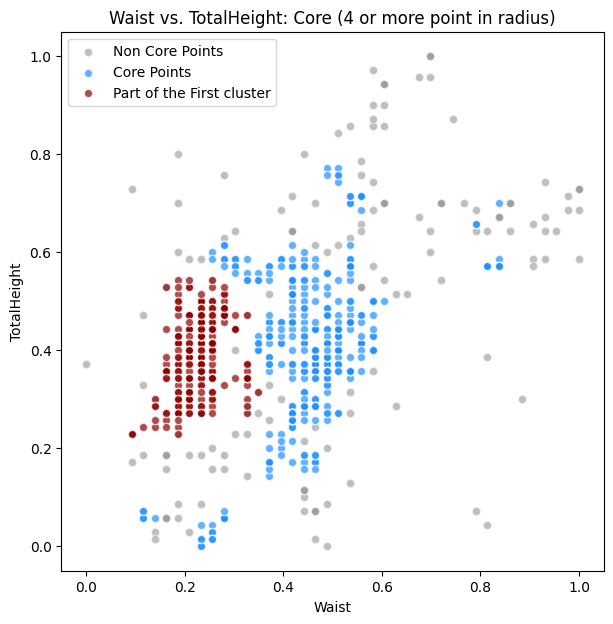

In [63]:
# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=0.5, label="Non Core Points")
plt.scatter(other_cluster_data['Waist'], other_cluster_data['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7, label='Core Points')
plt.scatter(expanded_cluster['Waist'], expanded_cluster['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Part of the First cluster')
plt.title('Waist vs. TotalHeight: Core (4 or more point in radius)')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

In [64]:
def expand_cluster(cluster, data, radius):
    expanded_cluster_indices = set(cluster.index)
    
    for index in cluster.index:
        points_in_radius = find_points_within_radius(data, data.loc[[index]], radius)
        expanded_cluster_indices.update(points_in_radius.index)
    
    return data.loc[list(expanded_cluster_indices)]

# Espandi il primo cluster
expanded_cluster_last = expand_cluster(expanded_cluster, data, radius)

print(f"Il cluster espanso contiene {len(expanded_cluster_last)} punti.")

Il cluster espanso contiene 233 punti.


In [65]:
# Remove points from expanded_cluster_last that are in expanded_cluster
expanded_cluster_last = expanded_cluster_last[~expanded_cluster_last.index.isin(expanded_cluster.index)]

print(f"Il cluster espanso contiene {len(expanded_cluster_last)} nuovi punti.")

Il cluster espanso contiene 2 nuovi punti.


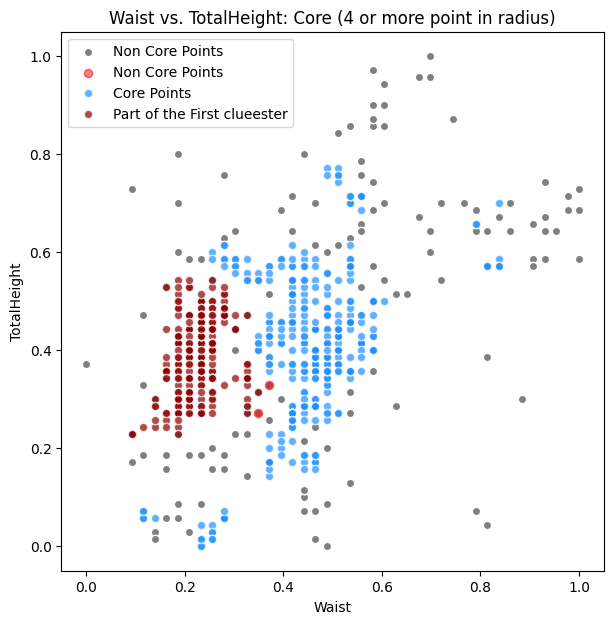

In [66]:
# Crea il grafico scatter
plt.figure(figsize=(7, 7))
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=1, label="Non Core Points")
plt.scatter(expanded_cluster_last['Waist'], expanded_cluster_last['TotalHeight'], facecolors='red', edgecolors='red', alpha=0.5, label="Non Core Points")

plt.scatter(other_cluster_data['Waist'], other_cluster_data['TotalHeight'], facecolors=color_blue_light, edgecolors='white', alpha=0.7, label='Core Points')
plt.scatter(expanded_cluster['Waist'], expanded_cluster['TotalHeight'], facecolors=color_red, edgecolors='white', alpha=0.7, label='Part of the First clueester')
plt.title('Waist vs. TotalHeight: Core (4 or more point in radius)')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()

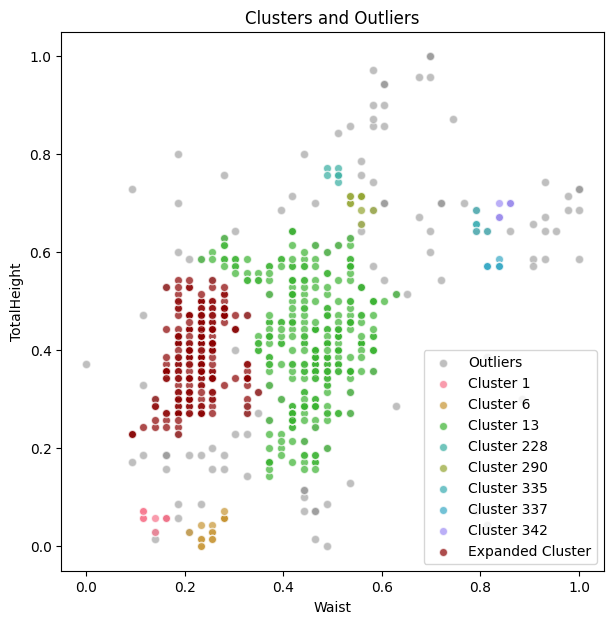

In [67]:
# Genera una lista di colori per i cluster
cluster_colors = sns.color_palette("husl", len(remaining_core_points) // 10 + 1)

# Inizializza una figura
plt.figure(figsize=(7, 7))

# Disegna i punti non core (outlier) in grigio
plt.scatter(non_core_points['Waist'], non_core_points['TotalHeight'], facecolors='grey', edgecolors='white', alpha=0.5, label="Outliers")

# Mantieni traccia dei punti già assegnati a un cluster
assigned_points = set(expanded_cluster.index)

# Itera sui core points rimanenti per formare nuovi cluster
for idx, cluster_idx in enumerate(remaining_core_points.index):
    if cluster_idx not in assigned_points:
        # Trova i punti nel raggio del core point corrente
        cluster_points = demonstrate_cluster_expansion(data, cluster_idx, radius, core_points)
        
        # Aggiungi i punti del cluster corrente ai punti assegnati
        assigned_points.update(cluster_points.index)
        
        # Disegna i punti del cluster corrente
        plt.scatter(cluster_points['Waist'], cluster_points['TotalHeight'], 
                    facecolors=cluster_colors[idx % len(cluster_colors)], 
                    edgecolors='white', alpha=0.7, label=f'Cluster {idx + 1}')

# Disegna il cluster espanso in rosso
plt.scatter(expanded_cluster['Waist'], expanded_cluster['TotalHeight'], facecolors='darkred', edgecolors='white', alpha=0.7, label='Expanded Cluster')

# Aggiungi titolo e etichette
plt.title('Clusters and Outliers')
plt.xlabel('Waist')
plt.ylabel('TotalHeight')
plt.legend()
plt.show()